In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
import tensorflow as tf
from tensorflow.keras import models, layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -u "/content/drive/MyDrive/lumpydataset/lumpyskin.zip" -d "/dataset"

Archive:  /content/drive/MyDrive/lumpydataset/lumpyskin.zip
  inflating: /dataset/Lumpy Skin/Lumpy_Skin.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_10.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_100.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_101.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_102.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_103.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_104.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_105.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_106.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_107.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_108.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_109.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_11.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_110.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_111.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_112.png  
  inflating: /dataset/Lumpy Skin/Lumpy_Skin_113.png  
  inflating: /dataset/Lumpy 

In [ ]:
BATCH_SIZE = 5
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
!pip install split-folders
import splitfolders 
input_folder = "/dataset"
output = "/output" 

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 1024 files [00:00, 2463.57 files/s]


In [ ]:
trainds = tf.keras.preprocessing.image_dataset_from_directory("/output/train",seed=123,shuffle=True,image_size=(256,256),batch_size=5)
testds = tf.keras.preprocessing.image_dataset_from_directory("/output/test",seed=123,shuffle=True,image_size=(256,256),batch_size=5)
valds = tf.keras.preprocessing.image_dataset_from_directory("/output/val",seed=123,shuffle=True,image_size=(256,256),batch_size=5)

Found 819 files belonging to 2 classes.
Found 103 files belonging to 2 classes.
Found 102 files belonging to 2 classes.


In [ ]:
!pip install Augmentor
import Augmentor
p = Augmentor.Pipeline("/output/train")
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.process()
p.sample(1000)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Initialised with 819 image(s) found.
Output directory set to /output/train/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7FDEC43544F0>: 100%|██████████| 819/819 [00:27<00:00, 29.45 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7FDEC4323F40>: 100%|██████████| 1000/1000 [00:31<00:00, 31.44 Samples/s]


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("/output/train/output",seed=123,shuffle=True,image_size=(256,256),batch_size=5)

Found 1819 files belonging to 2 classes.


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),   # Flatten the array
    layers.Dense(64, activation='relu'),  # Hidden Layer
    layers.Dense(2, activation='sigmoid'), #output layer
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (5, 256, 256, 3)          0         
                                                                 
 conv2d_24 (Conv2D)          (5, 254, 254, 32)         896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (5, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (5, 125, 125, 64)         18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (5, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (5, 60, 60, 64)          

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=valds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
364/364 [==============================] - 217s 593ms/step - loss: 0.6061 - accuracy: 0.6861 - val_loss: 0.6477 - val_accuracy: 0.6863
Epoch 2/10
364/364 [==============================] - 215s 590ms/step - loss: 0.5176 - accuracy: 0.7438 - val_loss: 0.5652 - val_accuracy: 0.7647
Epoch 3/10
364/364 [==============================] - 214s 588ms/step - loss: 0.4973 - accuracy: 0.7548 - val_loss: 0.5712 - val_accuracy: 0.8137
Epoch 4/10
364/364 [==============================] - 216s 593ms/step - loss: 0.4438 - accuracy: 0.7911 - val_loss: 0.5387 - val_accuracy: 0.7549
Epoch 5/10
364/364 [==============================] - 215s 590ms/step - loss: 0.3754 - accuracy: 0.8285 - val_loss: 0.5162 - val_accuracy: 0.8235
Epoch 6/10
364/364 [==============================] - 214s 588ms/step - loss: 0.3098 - accuracy: 0.8593 - val_loss: 0.6351 - val_accuracy: 0.7647
Epoch 7/10
364/364 [==============================] - 213s 586ms/step - loss: 0.2562 - accuracy: 0.8895 - val_loss: 0.6089 -

In [ ]:
model.evaluate(testds)

21/21 [==============================] - 3s 160ms/step - loss: 1.0028 - accuracy: 0.7670


[1.0028300285339355, 0.7669903039932251]

In [ ]:
class_names = ['Normal Skin','Lumpy Skin']

In [ ]:
def Predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    print(predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class,confidence

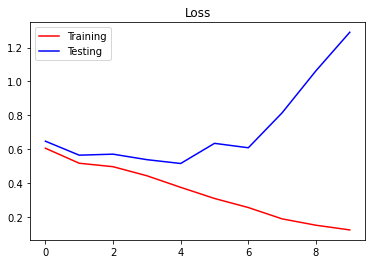

In [ ]:
plt.figure(0)

plt.title("Loss")

plt.plot(history.history['loss'], 'r', label='Training')

plt.plot(history.history['val_loss'], 'b', label='Testing')

plt.legend()

plt.show()

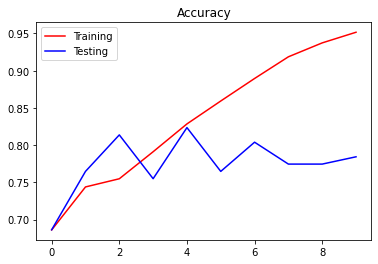

In [ ]:
plt.figure(1)

plt.title("Accuracy")

plt.plot(history.history['accuracy'], 'r', label='Training')

plt.plot(history.history['val_accuracy'], 'b', label='Testing')

plt.legend()

plt.show()